# Linear Regression Lab

This workbook is to accompany the PDF on Moodle. I will go through a simple linear regression example, then ask you to build multiple different ones. I will build the model by referring to the PDF

step 1, import the things we probably always want

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


These ones are not for always, but I like this plotting style for this workbook

In [3]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15
y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [86]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

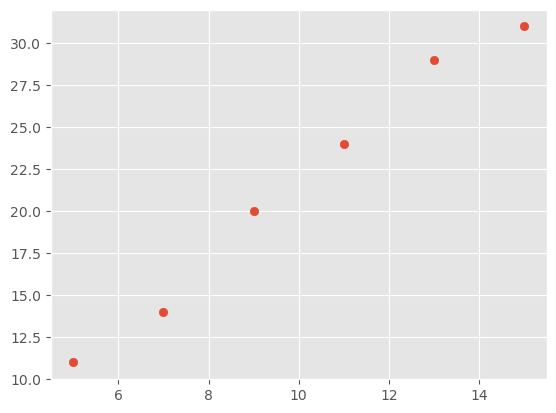

In [87]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient (if you don't know what this, don't worry about it

In [88]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Referring to section 2 Data Structure of the PDF let's look at X and y in more detail

In [89]:
y.shape

(6,)

In [90]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [91]:
X.shape

(6,)

In [92]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [93]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [94]:
X = X.reshape(-1,1)

In [95]:
X.shape

(6, 1)

In [96]:
X.ndim

2

2d array. Good. Let's look at it

In [97]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [100]:
model = LinearRegression()

Now "fit" the model using x and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [101]:
model.fit(X,y)

LinearRegression()

## Section 4 Inferences

In [102]:
model.coef_

array([2.12857143])

In [103]:
model.intercept_

0.2142857142857153

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [104]:
w0 = model.intercept_
w1 = model.coef_[0]

In [105]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [106]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [107]:
pred = model.predict(X)

In [108]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [109]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation

In [27]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
#from sklearn.metrics import root_mean_squared_error as rms

I had to comment out rms on my ATU laptop as sklearn is not up to date - it might work for you do so try uncommenting

In [111]:
mse(y,pred)

0.723809523809522

In [112]:
r2(y,pred)

0.9864918906909576

Very close to 1!

In [113]:
#rms(y,pred)

In [114]:
rmse = np.sqrt(mse(y,pred))

In [115]:
rmse

0.8507699593953244

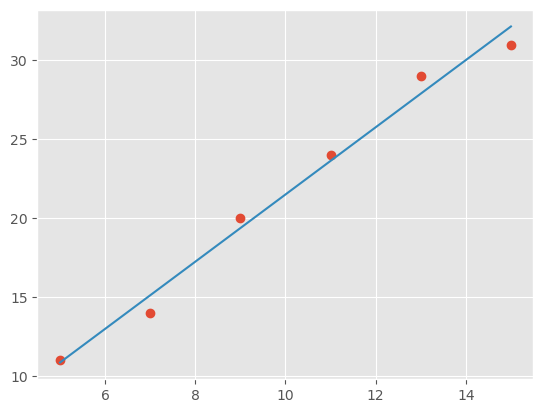

In [116]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [117]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

# Work for you now

We assume that the value of cars goes down with age, can we make a model that will predict the value of a particular type of car, just by looking at its age

This is a collection of data for a particular make and model of car. The person collecting the data recorded the age of a car and its value. 

You should notice there are cars that are 5 years of age yet have different values, this is because there is variance that our model is not capturing but maybe it can show some interesting things

In [4]:
X=np.array([5,4,6,5,5,5,6,6,2,7,7])
y=np.array([85,103,70,82,89,98,66,95,169,70,48])

Go build and evaluate a model for this

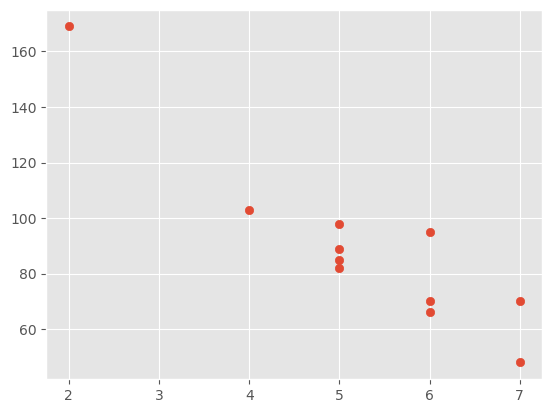

In [5]:
plt.scatter(X,y)
plt.show()

In [6]:
np.corrcoef(X, y)

array([[ 1.        , -0.92378209],
       [-0.92378209,  1.        ]])

In [15]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X,y)

LinearRegression()

In [19]:
model.coef_

array([-20.26126126])

In [20]:
model.intercept_

195.4684684684685

In [21]:
w0 = model.intercept_
w1 = model.coef_[0]

In [22]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [23]:
predictions

array([[ 94.16216216, 114.42342342,  73.9009009 ,  94.16216216,
         94.16216216,  94.16216216,  73.9009009 ,  73.9009009 ,
        154.94594595,  53.63963964,  53.63963964]])

In [24]:
pred = model.predict(X)

In [25]:
pred

array([ 94.16216216, 114.42342342,  73.9009009 ,  94.16216216,
        94.16216216,  94.16216216,  73.9009009 ,  73.9009009 ,
       154.94594595,  53.63963964,  53.63963964])

In [26]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]])

In [28]:
mse(y,pred)

129.41195741195745

In [29]:
r2(y,pred)

0.8533733463785714

In [30]:
rmse = np.sqrt(mse(y,pred))

In [31]:
rmse

11.375937649792101

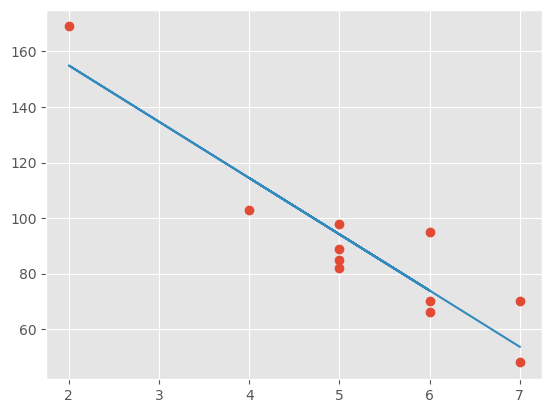

In [32]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

In [35]:
model.score(X,y)

0.8533733463785714

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [6]:
#your code (if any) here
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LinearRegression

In [7]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

Given that the "wt" has the highest co-efficient, i choose to use this as the X

In [121]:
#your code here
#define  predictor and response for set

X = dfcars["wt"]
y = dfcars["mpg"]

# Plot values
plt.scatter(X,y)
plt.show()


In [38]:
# Re-shape array
X = X.values.reshape(-1, 1)
X

In [41]:
# create linear regression object with sklearn
model = LinearRegression()

# train the model and make predictions
model.fit(X,y)

#print out coefficients
model.coef_

array([-5.34447157])

In [42]:
model.intercept_

37.28512616734204

In [46]:
# Run prediction
# Plot outputs
pred = model.predict(X)
pred

array([23.28261065, 21.9197704 , 24.88595212, 20.10265006, 18.90014396,
       18.79325453, 18.20536265, 20.23626185, 20.45004071, 18.90014396,
       18.90014396, 15.53312687, 17.3502472 , 17.08302362,  9.22665041,
        8.29671236,  8.71892561, 25.52728871, 28.65380458, 27.47802083,
       24.11100374, 18.47258623, 18.92686632, 16.76235533, 16.73563297,
       26.94357367, 25.847957  , 29.19894068, 20.34315128, 22.48093991,
       18.20536265, 22.4274952 ])

In [49]:
# Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [50]:
# Mean squared Error
mse(y,pred)

8.697560548229477

In [51]:
# R^2 (coefficient of determination) regression score function.
r2(y,pred)

0.7528327936582646

In [52]:
rmse = np.sqrt(mse(y,pred))
rmse

2.949162685955028

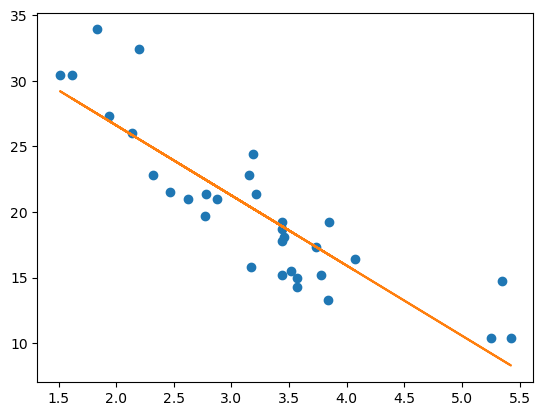

In [53]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

## Multiple linear regression with automobile data

> **EXERCISE:** With either sklearn or statsmodels, fit the training data using multiple linear regression with two predictors.  Use the model to make mpg predictions.

>How do these mean squared errors compare to those from the simple linear regression?

>Time permitting, repeat the training and testing with three predictors and calculate the mean squared errors.  How do these compare to the errors from the one and two predictor models?

In [94]:
#your code here
# Initialize arrays
new = dfcars[["wt","hp", "disp", "drat"]]
y = dfcars["mpg"]

In [95]:
# Create model
model = LinearRegression()

In [96]:
# Train model
model.fit(new,y)

LinearRegression()

In [97]:
# print out coefficients
model.coef_

array([-3.47966753, -0.03478353,  0.00381524,  1.76804877])

In [98]:
model.intercept_

29.1487375533427

In [99]:
# Run prediction and output
pred = model.predict(new)
pred

array([23.71164864, 22.82433342, 25.06007401, 20.56534009, 18.03440317,
       19.19506065, 15.25328193, 22.97581484, 22.35128621, 20.47049213,
       20.47049213, 15.20560777, 16.38869473, 16.21471135, 10.73103519,
        9.85571822,  9.93920534, 26.71165419, 30.7256249 , 28.23504736,
       24.19734518, 17.77583898, 18.70773637, 15.19500465, 16.65398405,
       27.63491065, 26.82837698, 26.98183451, 17.73565389, 20.37648652,
       12.48112074, 23.41218121])

Run metrics

In [100]:
mse(y,pred)

5.713673905812296

In [101]:
r2(y,pred)

0.8376288604814853

In [102]:
rmse = np.sqrt(mse(y,pred))
rmse

2.3903292463199075

In [103]:
model.score(new,y)

0.8376288604814853

# Diabetes Dataset

Now we are going to do similar with the diabetes dataset built into sklearn

In [104]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


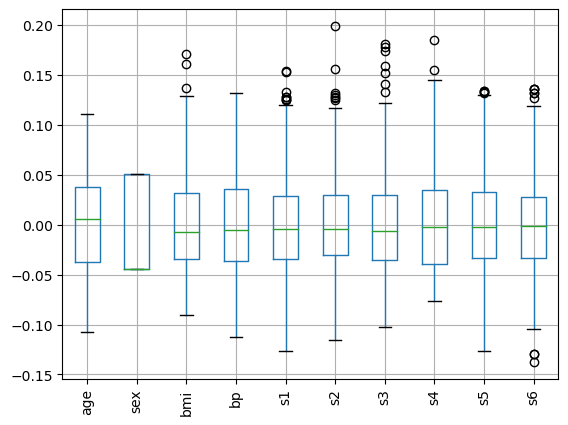

In [105]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [106]:
X = data 
y = diabetes.target

In [107]:
lr = LinearRegression()

In [108]:
lr.fit(X,y)

LinearRegression()

In [109]:
r_squared = lr.score(X,y)

Let's do a slightly different r2

In [110]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853231

In [111]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [112]:
lr.intercept_

152.13348416289597

Text(0, 0.5, 'Coefficient')

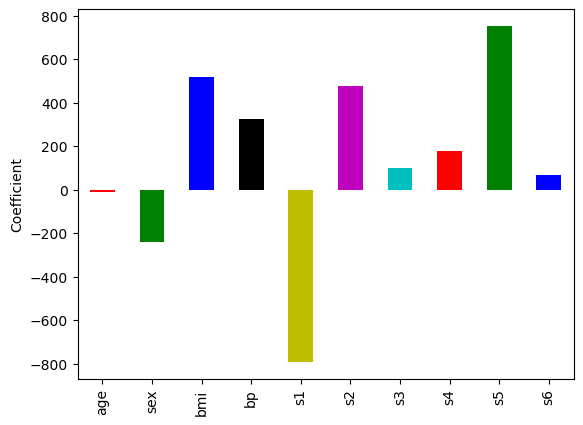

In [113]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out, from past stuff I've done, you would get a better model without age, s3, s4 and s6. Maybe we'll look into that later

In [114]:
X = data.drop(["age"], axis=1)

In [115]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [116]:
lr.score(X,y)

0.5177170179957553

In [117]:
r_squared = lr.score(X,y)

r2 score is the same, but your lecturer said it should be better. Well R2 is not always the best, there is an adjusted r2

In [118]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5076694558706669

Slightly better than the model with age included.

There are lots of other metrics that could be used, some could be better than others, typically we look at multiple ones to make our determination